In [78]:
import pandas as pd
import numpy as np
import os
import math
from math import exp
import matplotlib.pyplot as plt
from time import time

#libreria simbólica
from sympy import *

#barycentric
from scipy.interpolate import barycentric_interpolate

# Lagrange
from scipy.interpolate import lagrange

#splines
from scipy.interpolate import UnivariateSpline

# Chebyshev
import numpy.polynomial.chebyshev as cheb

Por pedirse que se empleen los nodos de Chebyshev, vamos a considerar el problema de interpolación para las funciones objetivo en el intervalo cerrado $[-1,1]$.

In [79]:
# funciones objetivo de la práctica
f1 = lambda x: np.sin(x)
f2 = lambda x: 1 / (1+ 25 * x * x)
f3 = lambda x: np.exp(-20* x * x)
# evaluar función
def eval_f(nod, f):
    return [f(i) for i in nod] 

In [80]:
# generamos las listas de nodos: equiespaciados y Chebyshev
nod11_eq = np.linspace(-1,1,11)
nod21_eq = np.linspace(-1,1,21)
nod_eq = [nod11_eq, nod21_eq]
name_eq = ['Equiespaciados 11', 'Equiespaciados 21'] 
# coeficientes de la serie de chebysev para el polinomio de chebysev de grado 12 y 22 ---> (0,...,0,1). Polinomios de grado n+1 para obtener n raíces.
coef12 = np.zeros(shape=12)
coef12[-1] = 1
coef22 = np.zeros(shape=22)
coef22[-1] = 1
nod11_ch = cheb.Chebyshev(coef12).roots()
nod21_ch = cheb.Chebyshev(coef22).roots()
nod_ch = [nod11_ch, nod21_ch]
name_ch = ['Chebyshev 11', 'Chebyshev 21'] 
# evaluación de las funciones objetivo en las listas de nodos 
# f1
y1_11_eq = eval_f(nod11_eq, f1)
y1_21_eq = eval_f(nod21_eq, f1)
y1_11_ch = eval_f(nod11_ch, f1)
y1_21_ch = eval_f(nod21_ch, f1)
# f2
y2_11_eq = eval_f(nod11_eq, f2)
y2_21_eq = eval_f(nod21_eq, f2)
y2_11_ch = eval_f(nod11_ch, f2)
y2_21_ch = eval_f(nod21_ch, f2)
f2_list = [y2_11_eq, y2_21_eq, y2_11_ch, y2_21_ch]
# f3
y3_11_eq = eval_f(nod11_eq, f3)
y3_21_eq = eval_f(nod21_eq, f3)
y3_11_ch = eval_f(nod11_ch, f3)
y3_21_ch = eval_f(nod21_ch, f3)
f3_list = [y3_11_eq, y3_21_eq, y3_11_ch, y3_21_ch]

Construimos una función para representar de manera uniforme los resultados en todos los casos. Esta función necesita de la definición de otra función plot_, que crearemos en cada apartado ajustarla a la construcción necesaria.

In [81]:
def represent_all():
    times = []
    errors = []
    # definimos arrays básicos para el cómputo del error y para la representación de la función objetivo
    x_plot = np.linspace(-1,1,100)
    f1_plot = eval_f(x_plot, f1)
    f2_plot = eval_f(x_plot, f2)
    f3_plot = eval_f(x_plot, f3)
    
    # f1 equiespaciados
    fig, ax = plt.subplots()
    ax.plot(x_plot, f1_plot, label='Goal Function')       
    y_list = [y1_11_eq, y1_21_eq]
    t, e = plot_(nod_eq, y_list, name_eq, ax, f1_plot)
    times.append(t)
    errors.append(e)
    plt.legend()
    plt.title('Función 1')
    plt.show()
    
    # f1 Chebyshev
    fig, ax = plt.subplots()
    ax.plot(x_plot, f1_plot, label='Goal Function')       
    y_list = [y1_11_ch, y1_21_ch]
    t, e = plot_(nod_ch, y_list, name_ch, ax, f1_plot)
    times.append(t)
    errors.append(e)
    plt.legend()
    plt.title('Función 1')
    plt.show()
    
    # f2 equiespaciados
    fig, ax = plt.subplots()
    ax.plot(x_plot, f2_plot, label='Goal Function')       
    y_list = [y2_11_eq, y2_21_eq]
    t, e = plot_(nod_eq, y_list, name_eq, ax, f2_plot)
    times.append(t)
    errors.append(e)
    plt.legend()
    plt.title('Función 2')
    plt.show()
    
    # f2 Chebyshev
    fig, ax = plt.subplots()
    ax.plot(x_plot, f2_plot, label='Goal Function')       
    y_list = [y2_11_ch, y2_21_ch]
    t, e = plot_(nod_ch, y_list, name_ch, ax, f2_plot)
    times.append(t)
    errors.append(e)
    plt.legend()
    plt.title('Función 2')
    plt.show()
    
    # f3 equiespaciados
    fig, ax = plt.subplots()
    ax.plot(x_plot, f3_plot, label='Goal Function')       
    y_list = [y3_11_eq, y3_21_eq]
    t, e = plot_(nod_eq, y_list, name_eq, ax, f3_plot)
    times.append(t)
    errors.append(e)
    plt.legend()
    plt.title('Función 3')
    plt.show()
    
    # f3 Chebyshev
    fig, ax = plt.subplots()
    ax.plot(x_plot, f3_plot, label='Goal Function')       
    y_list = [y3_11_ch, y3_21_ch]
    t, e = plot_(nod_ch, y_list, name_ch, ax, f3_plot)
    times.append(t)
    errors.append(e)
    plt.legend()
    plt.title('Función 3')
    plt.show()
    return times, errors

### Interpolación baricéntrica

In [82]:
def bar_int(x, y, ax, name, f_goal):
    x_plot = np.linspace(-1,1,100)
    t0 = time()
    interp_values = barycentric_interpolate(x, y, x_plot)
    t1 = time()
    error = np.linalg.norm(np.array(interp_values) - np.array(f_goal))
    ax.plot(x_plot, interp_values, label=name)
    return t1 - t0, error
def plot_(x_list, y_list, name_list, ax, f_goal):
    times = list()
    error = list()
    for i in range(2):
        t, e = bar_int(x_list[i], y_list[i], ax, name_list[i], f_goal)
        times.append(t)
        error.append(e)
    return times, error

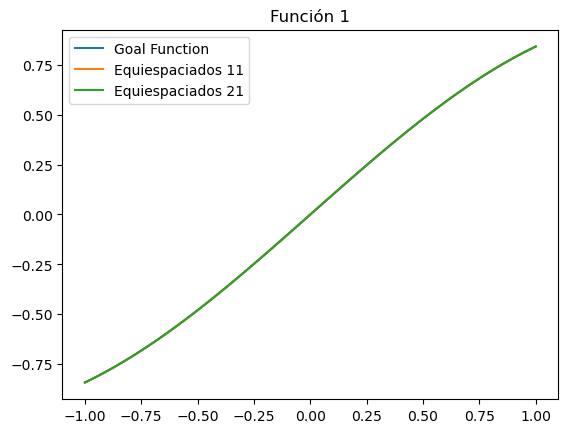

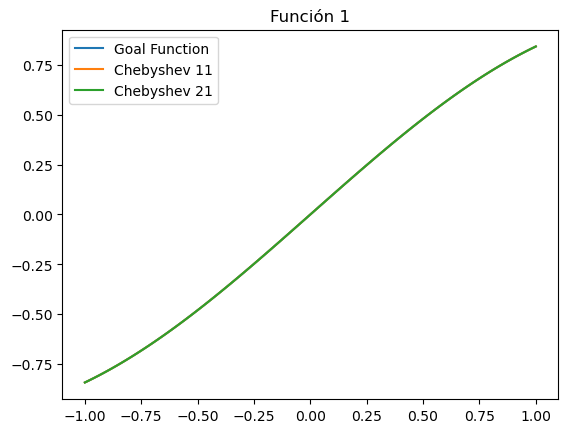

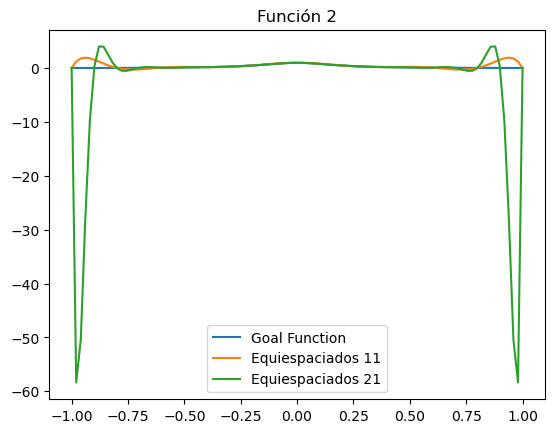

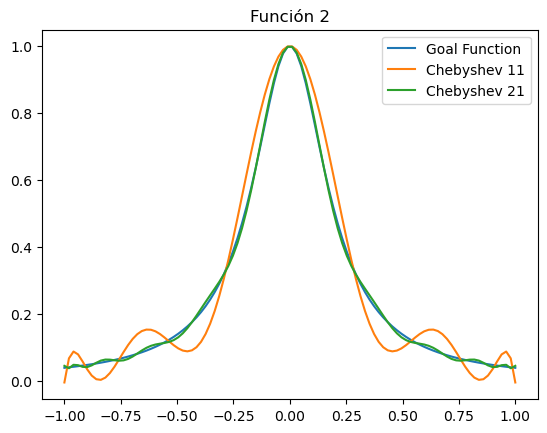

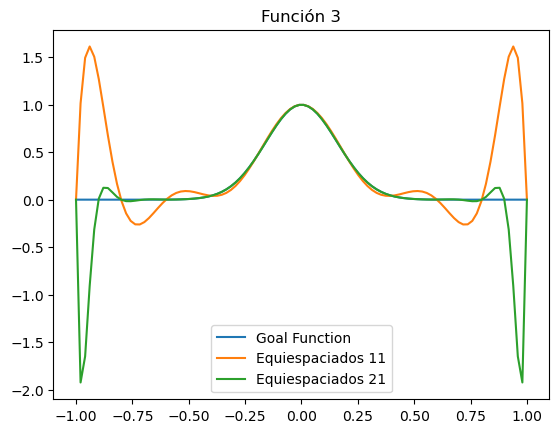

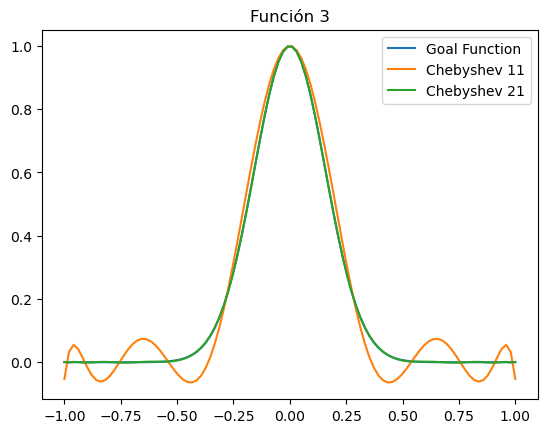

In [83]:
times_bar, error_bar = represent_all()

### Interpolación mediante el polinomio de Lagrange

In [84]:
def lag_int(x, y, ax, name, f_goal):
    x_plot = np.linspace(-1,1,100)
    t0 = time()
    interp = lagrange(x, y)
    interp_values = eval_f(x_plot, interp)
    t1 = time()
    error = np.linalg.norm(np.array(interp_values) - np.array(f_goal))
    ax.plot(x_plot, interp_values, label=name)   
    return t1 - t0, error
# sobreescribimos la función plot_
def plot_(x_list, y_list, name_list, ax, f_goal):
    times = list()
    error = list()
    for i in range(2):
        t, e = lag_int(x_list[i], y_list[i], ax, name_list[i], f_goal)
        times.append(t)
        error.append(e)
    return times, error

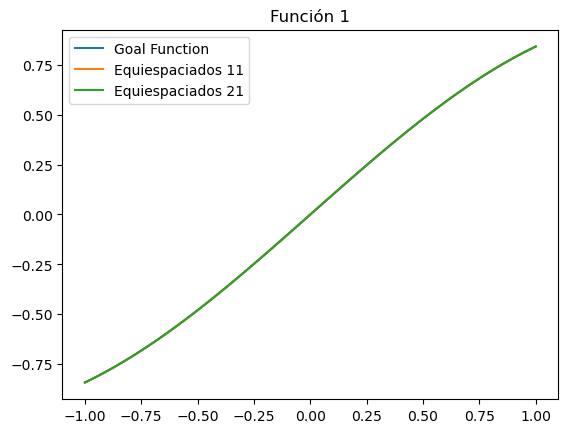

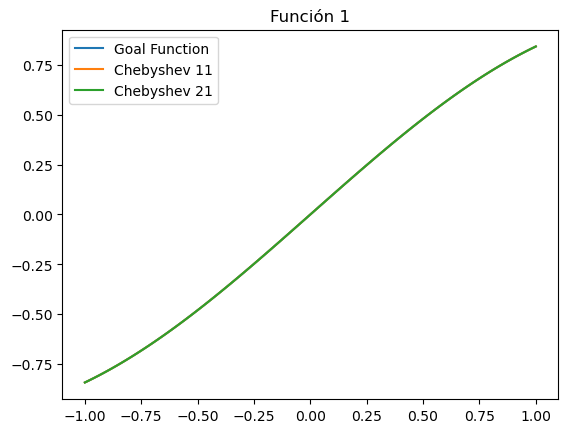

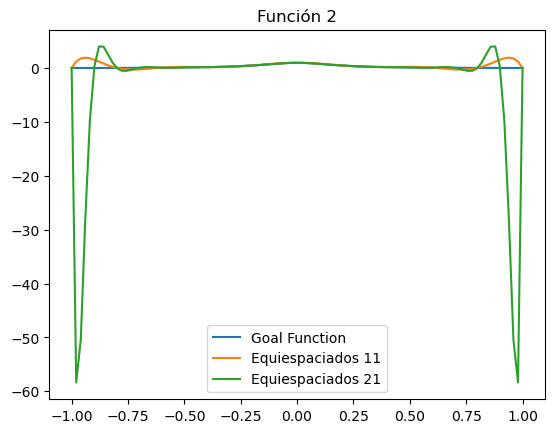

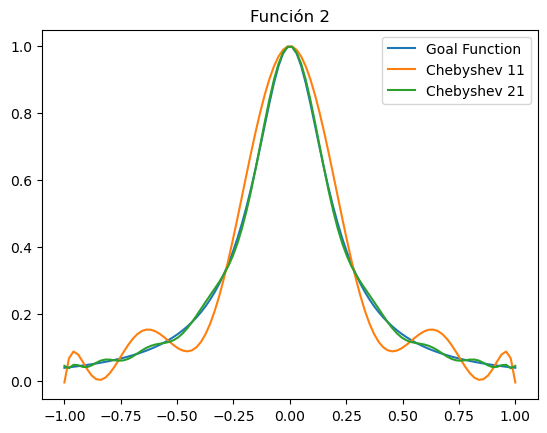

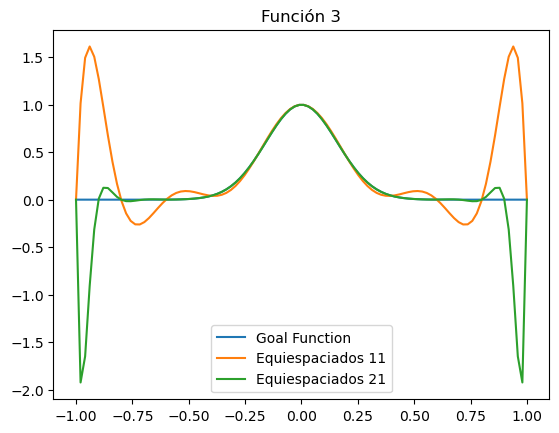

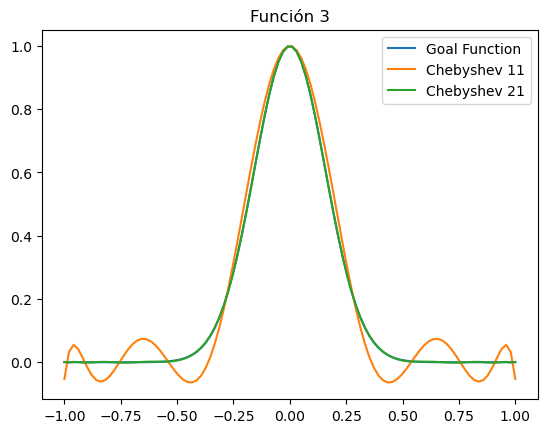

In [85]:
times_lag, error_lag = represent_all()

### Diferencias divididas de Newton

In [86]:
# implementación del método de Newton
def newton_pol(x,f):
    """ 
    type x: list
    params x: lista con los nodos en los que se quiere evaluar
    type f: list
    params f: lista de valores de la función que se quiere interpolar en los nodos x
    """
    z = symbols('z')
    coef = list()
    coef.append(f[0])
    p = list()
    p.append(1)
    # inicializamos para entrar en el bucle
    dif = np.diff(f) / np.diff(x)
    coef.append(dif[0])
    p.append(z - x[0])
    i = 1
    while len(dif) > 1:
        i += 1
        dif = np.diff(dif) / np.array([x[j+i] - x[j] for j in  range(len(x)-i)])        
        coef.append(dif[0])
        p.append(p[-1]* (z - x[i-1]))
    return lambdify(z, np.sum(np.array(coef) * np.array(p)), 'numpy')

In [87]:
def new_int(x, y, ax, name, f_goal):
    x_plot = np.linspace(-1,1,100)
    t0 = time()
    interp = newton_pol(x, y)
    interp_values = eval_f(x_plot, interp)
    t1 = time()
    error = np.linalg.norm(np.array(interp_values) - np.array(f_goal))
    ax.plot(x_plot, interp_values, label=name)   
    return t1 - t0, error
# sobreescribimos la función plot_
def plot_(x_list, y_list, name_list, ax, f_goal):
    times = list()
    error = list()
    for i in range(2):
        t, e = new_int(x_list[i], y_list[i], ax, name_list[i], f_goal)
        times.append(t)
        error.append(e)
    return times, error

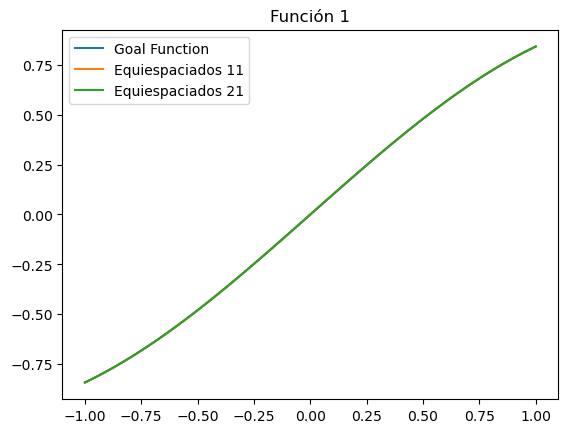

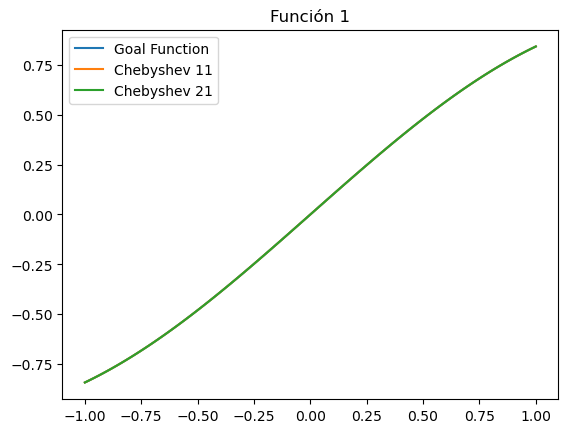

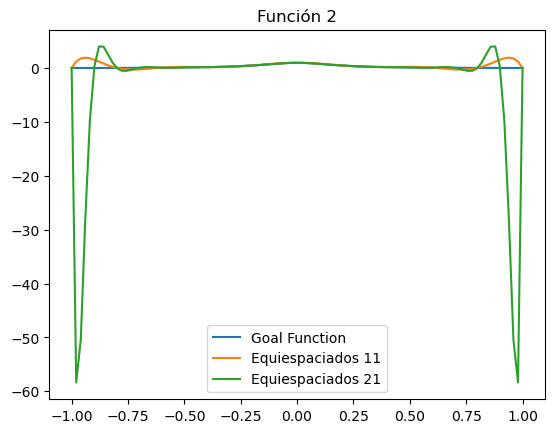

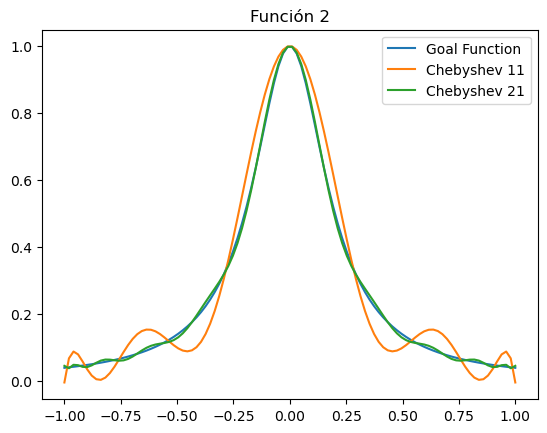

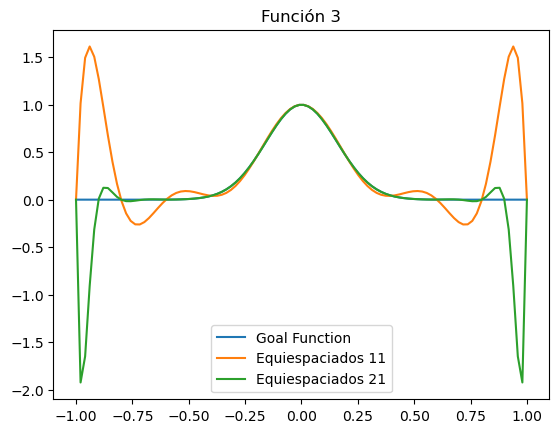

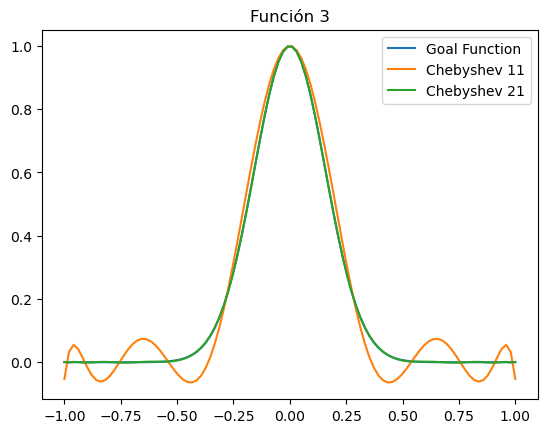

In [88]:
times_new, error_new = represent_all()

### SPLINES CÚBICOS

In [89]:
from scipy.interpolate import CubicSpline
def spline_int(x, y, ax, name, f_goal):
    x_plot = np.linspace(-1,1,100)
    t0 = time()
    interp = CubicSpline(x, y)
    interp_values = eval_f(x_plot, interp)
    t1 = time()
    error = np.linalg.norm(np.array(interp_values) - np.array(f_goal))
    ax.plot(x_plot, interp_values, label=name)   
    return t1 - t0, error
# sobreescribimos la función plot_
def plot_(x_list, y_list, name_list, ax, f_goal):
    times = list()
    error = list()
    for i in range(2):
        t, e = spline_int(x_list[i], y_list[i], ax, name_list[i], f_goal)
        times.append(t)
        error.append(e)
    return times, error

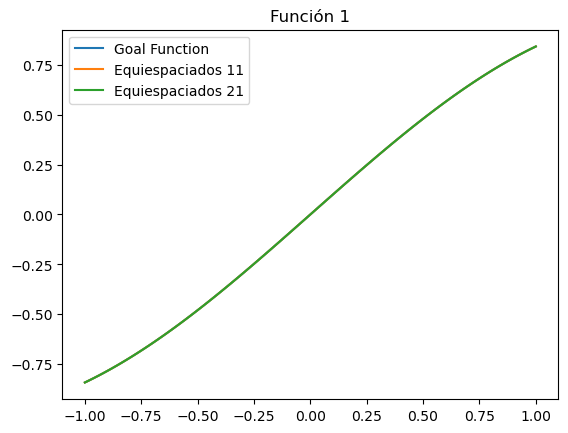

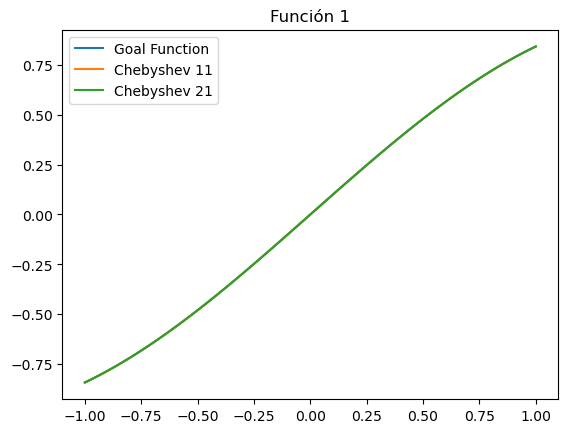

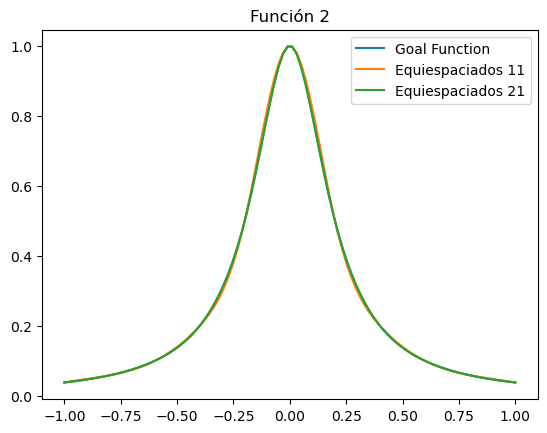

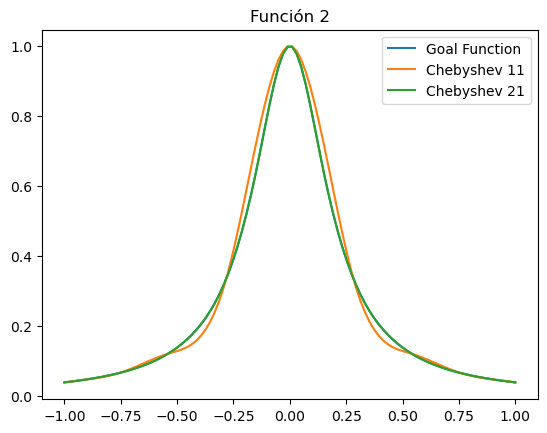

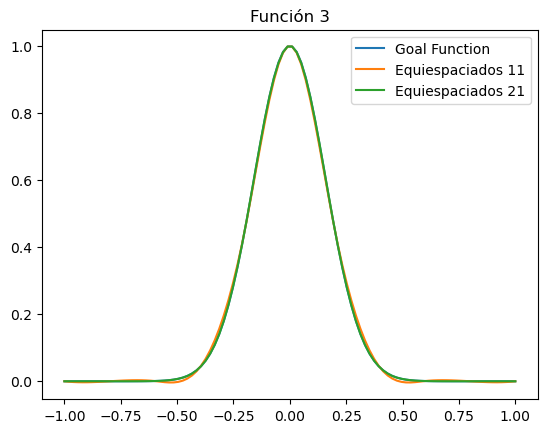

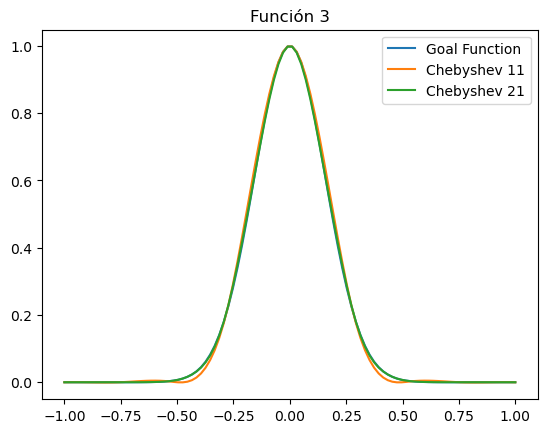

In [90]:
times_spline, error_spline = represent_all()

In [152]:
def bar_plot(title, dict, ylabel):
    series = ('Función 1', 'Función 2', 'Función 3')
    x = np.array([3, 8, 13])# the label locations
    width = 1  # the width of the bars
    multiplier = 0
    
    fig, ax =plt.subplots()

    for attribute, measurement in dict.items():
        offset = width * multiplier
        rects = ax.bar(x + offset - 0.5, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3, fmt='%.2E', rotation=90)
        multiplier += 1
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + width, series)
    if (title != 'Resultados para 21 nodos equiespaciados distribuidos por método y función' and ylabel == 'Error'):
        ax.set_ylim([0,10])
    ax.legend()
    
    plt.show()

In [100]:
times = np.array([times_bar, times_lag, times_new, times_spline])
errors = np.array([error_bar, error_lag, error_new, error_spline])
titles = ['Resultados para 11 nodos equiespaciados distribuidos por método y función',
          'Resultados para 11 nodos de Chebyshev distribuidos por método y función',
          'Resultados para 21 nodos equiespaciados distribuidos por método y función',
          'Resultados para 21 nodos de Chebyshev distribuidos por método y función']
errors_labeled_eq11 = {'Interpolación Baricéntrica':[errors[0,i,0] for i in [0,2,4]], 'Interpolador de Lagrange':[errors[1, i, 0] for i in [0,2,4]], 
                       'Interpolador de Newton':[errors[2, i, 0] for i in [0,2,4]], 'Splines cúbicos': [errors[3, i, 0] for i in [0,2,4]]}
errors_labeled_eq21 = {'Interpolación Baricéntrica':[errors[0,i,1] for i in [0,2,4]], 'Interpolador de Lagrange':[errors[1, i, 1] for i in [0,2,4]], 
                       'Interpolador de Newton':[errors[2, i, 1] for i in [0,2,4]], 'Splines cúbicos': [errors[3, i, 1] for i in [0,2,4]]}
errors_labeled_ch11 = {'Interpolación Baricéntrica':[errors[0,i,0] for i in [1,3,5]], 'Interpolador de Lagrange':[errors[1, i, 0] for i in [1,3,5]], 
                       'Interpolador de Newton':[errors[2, i, 0] for i in [1,3,5]], 'Splines cúbicos': [errors[3, i, 0] for i in [1,3,5]]}
errors_labeled_ch21 = {'Interpolación Baricéntrica':[errors[0,i,1] for i in [1,3,5]], 'Interpolador de Lagrange':[errors[1, i, 1] for i in [1,3,5]], 
                       'Interpolador de Newton':[errors[2, i, 1] for i in [1,3,5]], 'Splines cúbicos': [errors[3, i, 1] for i in [1,3,5]]}


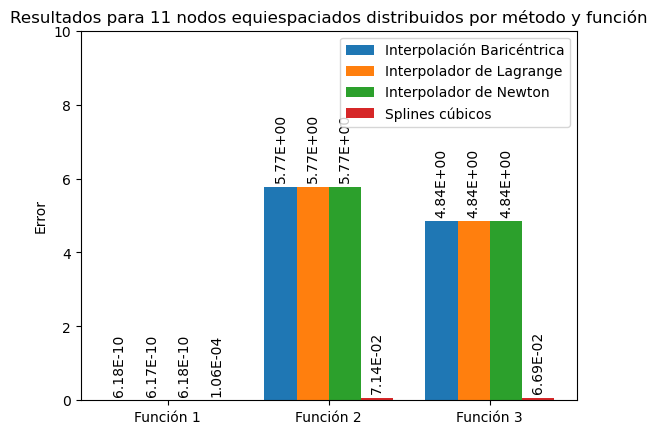

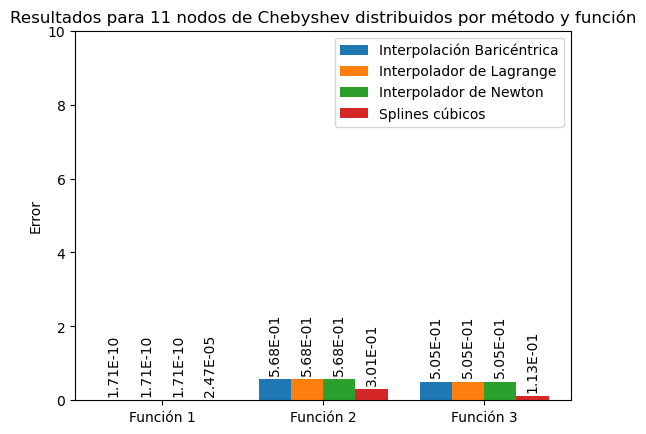

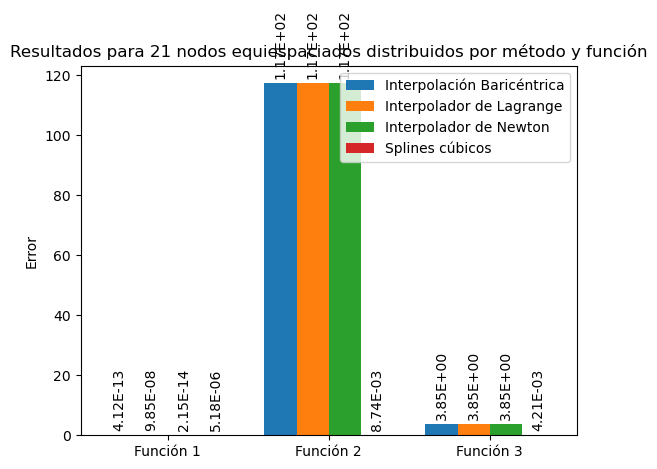

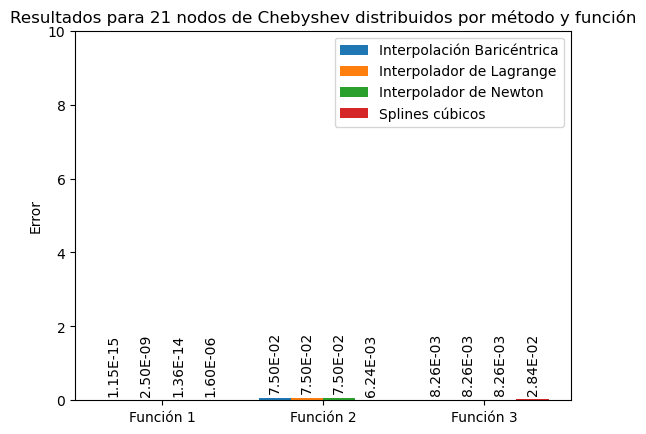

In [154]:
bar_plot(titles[0], errors_labeled_eq11, 'Error')
bar_plot(titles[1], errors_labeled_ch11, 'Error')
bar_plot(titles[2], errors_labeled_eq21, 'Error')
bar_plot(titles[3], errors_labeled_ch21, 'Error')

In [145]:
times_labeled_eq11 = {'Interpolación Baricéntrica':[times[0,i,0] for i in [0,2,4]], 'Interpolador de Lagrange':[times[1, i, 0] for i in [0,2,4]], 
                       'Interpolador de Newton':[times[2, i, 0] for i in [0,2,4]], 'Splines cúbicos': [times[3, i, 0] for i in [0,2,4]]}
times_labeled_eq21 = {'Interpolación Baricéntrica':[times[0,i,1] for i in [0,2,4]], 'Interpolador de Lagrange':[times[1, i, 1] for i in [0,2,4]], 
                       'Interpolador de Newton':[times[2, i, 1] for i in [0,2,4]], 'Splines cúbicos': [times[3, i, 1] for i in [0,2,4]]}
times_labeled_ch11 = {'Interpolación Baricéntrica':[times[0,i,0] for i in [1,3,5]], 'Interpolador de Lagrange':[times[1, i, 0] for i in [1,3,5]], 
                       'Interpolador de Newton':[times[2, i, 0] for i in [1,3,5]], 'Splines cúbicos': [times[3, i, 0] for i in [1,3,5]]}
times_labeled_ch21 = {'Interpolación Baricéntrica':[times[0,i,1] for i in [1,3,5]], 'Interpolador de Lagrange':[times[1, i, 1] for i in [1,3,5]], 
                       'Interpolador de Newton':[times[2, i, 1] for i in [1,3,5]], 'Splines cúbicos': [times[3, i, 1] for i in [1,3,5]]}

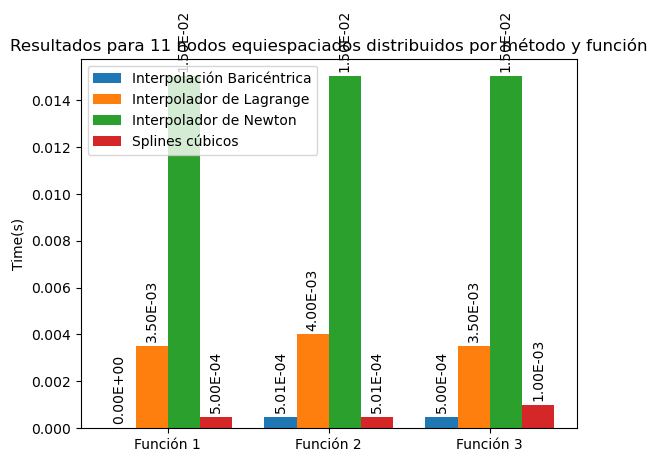

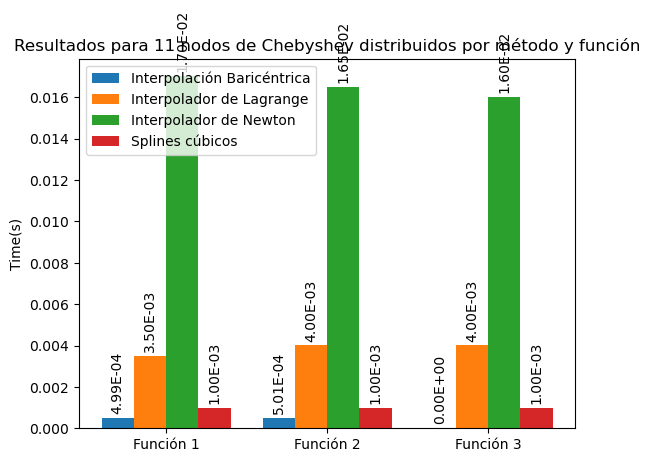

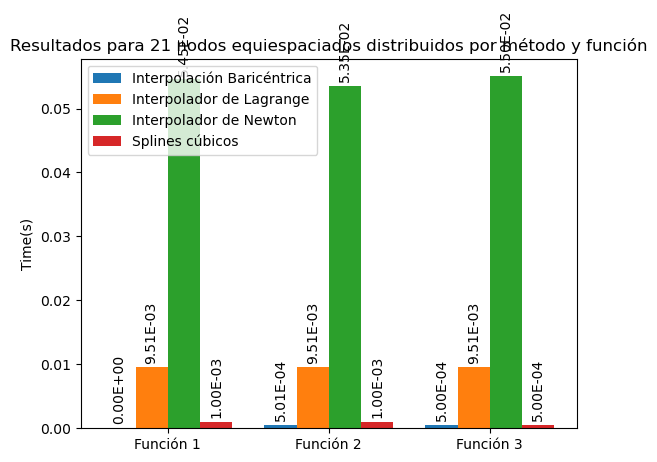

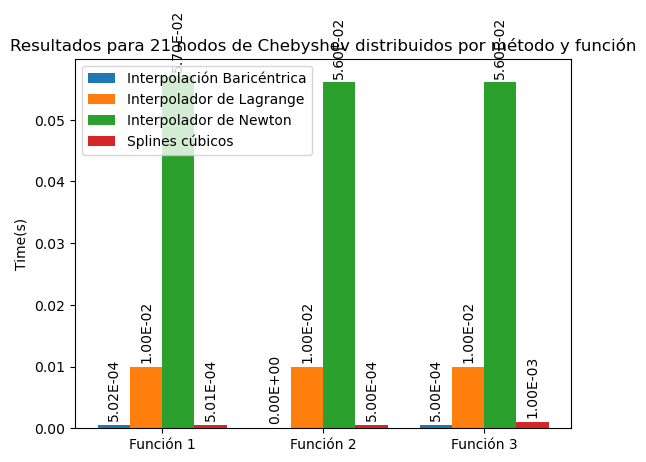

In [155]:
bar_plot(titles[0], times_labeled_eq11, 'Time(s)')
bar_plot(titles[1], times_labeled_ch11, 'Time(s)')
bar_plot(titles[2], times_labeled_eq21, 'Time(s)')
bar_plot(titles[3], times_labeled_ch21, 'Time(s)')